# Решающие деревья, решающие леса и градиентный бустинг.

## 1. Решающее дерево vs решающий лес. 

Будем сравнивать эти алгоритмы на примере задачи регрессии: задачи предсказания стоимости домов в Бостоне.

In [1]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
X_full = data.data
y_full = data.target

In [3]:
X_full.shape

(506, 13)

In [4]:
y_full[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Будем оценивать качество алгоритмов по кросс-валидации.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

model_lin = LinearRegression()

score = cross_val_score(model_lin, X_full, y_full, cv=3, scoring='r2').mean()

print(score)

-1.5841985220996833


### Задание 1.

Посмотрите на качество решающего дерева на кросс-валидации. Запустите ячейку несколько раз и посмотрите, меняется ли качество.

In [9]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()

score = cross_val_score(model_dt, X_full, y_full, cv=3, scoring='r2').mean()

print(score)

0.3493220387287743


### Задание 2.

Посмотрите на качество случайного леса на кросс-валидации. Запустите ячейку несколько раз и посмотрите, меняется ли качество.

In [13]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

score = cross_val_score(model_rf, X_full, y_full, cv=3, scoring='r2').mean()

print(score)

0.5606537231375862


Подберём параметры у случайного леса:
    
    * n_estimators - число деревьев в лесе
    * max_depth - максимальная глубина деревьев
    * max_features - максимальное число признаков для построения каждого дерева
    * min_samples_split - минимальное число объектов, необходимое для разбиения внутренней вершины
    
и другие, см. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Самый важный параметр - число деревьев в лесе. Начнём с него.

### Задание 3. 

Постройте лес из 10, 100, 500 и 1000 деревьев и посмотрите на r2 на кросс-валидации.

Примените цикл по количеству деревьев.

In [14]:
for n in [10, 100, 500, 1000, 10000]:
    print('n_estimators:', n)
    
    model_rf = RandomForestRegressor(n_estimators=n, n_jobs=-1)

    score = cross_val_score(model_rf, X_full, y_full, cv=3, scoring='r2').mean()

    print('r2:', score)

n_estimators: 10
r2: 0.5599157228899359
n_estimators: 100
r2: 0.5394352541386024
n_estimators: 500
r2: 0.5544174647024037
n_estimators: 1000
r2: 0.5567371434556286
n_estimators: 10000
r2: 0.5558329896841806


Мы видим, что чем больше деревьев в лесе, тем дольше он обучается. Однако качество алгоритма при 1000 и 10000 деревьев различается незначительно. Добавим в предыдущий цикл время работы алгоритма.

In [15]:
from time import time

for n in [10, 100, 500, 1000, 10000]:
    print('n_estimators:', n)
    model_rf = RandomForestRegressor(n_estimators=n)

    t_start = time()
    
    score = cross_val_score(model_rf, X_full, y_full, cv=3, scoring='r2').mean()

    t_end = time()
    print('time:', t_end-t_start)
    print('r2:', score)
    print()

n_estimators: 10
time: 0.08707690238952637
r2: 0.5566245068758956

n_estimators: 100
time: 0.6778302192687988
r2: 0.5618055689555922

n_estimators: 500
time: 3.422924041748047
r2: 0.5577660713020948

n_estimators: 1000
time: 6.454978942871094
r2: 0.5563268080010206

n_estimators: 10000
time: 67.66514420509338
r2: 0.5555449695414968



Решающий лес устроим таким образом, что чем больше деревьев в лесе, тем лучше качество предсказания. Однако, начиная с некоторого количества деревьев, качество увеличивается незначительно. А время, затрачиваемое на обучение алгоритма, увеличивается с увеличением числа деревьев. Построим график качества алгоритма в зависимости от количества деревьев.

In [16]:
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import cross_val_score
from time import time

r2_list = []
time_list = []

n_list = np.arange(10,2000,100)

for n in tqdm(n_list):
    model_rf = RandomForestRegressor(n_estimators=n)

    t_start = time()

    score = cross_val_score(model_rf, X_full, y_full, cv=3, scoring='r2').mean()

    t_end = time()

    r2_list.append(score)
    time_list.append(t_end-t_start)

100%|██████████| 20/20 [02:18<00:00,  6.91s/it]


Populating the interactive namespace from numpy and matplotlib


/Users/vladtitov/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


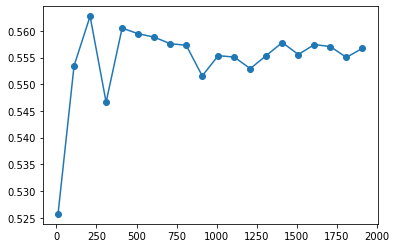

In [17]:
from matplotlib import pylab as plt
%pylab inline

plot(n_list, r2_list, '-o')
show()

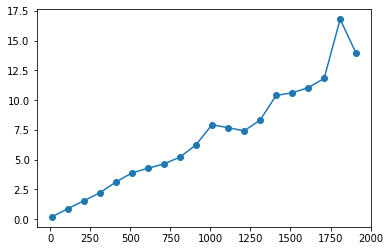

In [18]:
plot(n_list, time_list, '-o')
show()

Будем использовать лес с 600 деревьями.

Далее будем подбирать параметры max_depth, max_features и min_samples_split с помощью функции GridSearchCV.

In [19]:
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(n_estimators=600, n_jobs=-1, random_state=123)

params = {'max_features': [None, 'log2', 'sqrt'], 
          'max_depth': [2, 6, 10, 20, 50]}

gs = GridSearchCV(model_rf,
                  params,
                  cv=3,
                  scoring='r2',
                  n_jobs=-1)
gs.fit(X_full, y_full)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=600, n_jobs=-1,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [20]:
gs.best_estimator_, gs.best_score_

(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=50, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False),
 0.5587984047786853)

### Задание 4. 

Попробуйте одновременно подбрать max_features, max_depth и min_samples_leaf. Последний параметр ищите по списку [1, 5, 10, 15, 20].

Улучшилось ли качество алгоритма при одновременном подборе трех параметров?

In [27]:
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(n_estimators=600, n_jobs=-1, random_state=123)

params = {'max_features': [None, 'log2', 'sqrt'], 
          'max_depth': [2, 6, 10, 20, 50],
          'min_samples_leaf': [1, 5, 10, 15, 20]}

gs = GridSearchCV(model_rf,
                  params,
                  cv=3,
                  scoring='r2',
                  n_jobs=-1)
gs.fit(X_full, y_full)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
           oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt'], 'max_depth': [2, 6, 10, 20, 50], 'min_samples_leaf': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [28]:
gs.best_estimator_, gs.best_score_

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
 0.5599514844492924)

## 2. Решающий лес vs градиентный бустинг.

Теперь будем решать задачу классификации ([Kaggle: Predicting a Biological Response](https://www.kaggle.com/c/bioresponse)).

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')
print(data.shape)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=241)

(3751, 1777)


In [22]:
len(y[y==0]), len(y[y==1])

(1717, 2034)

### Задание 5.

Посмотрите на качество решающего леса с 10 деревьями на кросс-валидации (здесь метрика - accuracy, её можно не передавать в функцию cross_val_score, так как она там стоит по умолчанию для задачи классификации).

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

model_rf = RandomForestClassifier(n_estimators=10)

score = cross_val_score(model_rf, X, y, cv=3).mean()

print(score)

#your code here

0.7555333866240342


### Задание 6.

Посмотрите на качество градиентного бустинга с 10 деревьями на кросс-валидации.

In [24]:
#your code here

model_gb = GradientBoostingClassifier(n_estimators=10)

score = cross_val_score(model_gb, X, y, cv=3).mean()

print(score)


0.7637964295230483


Нарисуем графики качества леса на тренировочной и тестовой выборках в зависимости от числа деревьев. Также нарисуем график времени работы алгоритма от числа деревьев.

In [25]:
from sklearn.metrics import accuracy_score
from time import time

acc_train = []
acc_test = []
time_list = []

n_list = np.arange(10,250,20)

for n in tqdm(n_list):
    model_rf = RandomForestClassifier(n_estimators=n)

    t_start = time()
    model_rf.fit(Xtrain, ytrain)

    pred_train = model_rf.predict(Xtrain)
    acc_train.append(accuracy_score(ytrain, pred_train))
    
    pred_test = model_rf.predict(Xtest)
    acc_test.append(accuracy_score(ytest, pred_test))

    t_end = time()

    time_list.append(t_end-t_start)

100%|██████████| 12/12 [00:06<00:00,  1.74it/s]


Text(0.5, 1.0, 'Time')

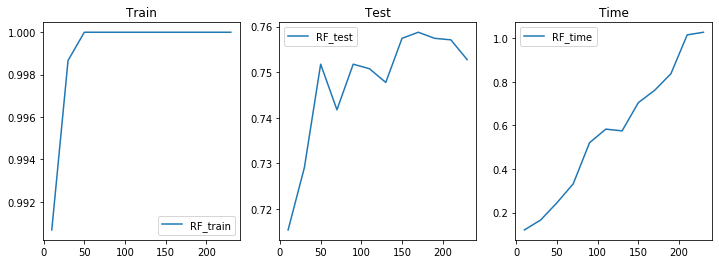

In [26]:
figure(figsize=(12, 4))
subplot(1, 3, 1)
plot(n_list, acc_train, label='RF_train')
plt.legend()
plt.title('Train')
plt.subplot(1, 3, 2)
plot(n_list, acc_test, label='RF_test')
plt.legend()
plt.title('Test')
plt.subplot(1, 3, 3)
plot(n_list, time_list, label='RF_time')
plt.legend()
plt.title('Time')

### Задание 7.

Теперь посмотрим, как меняется качество бустинга при увеличении числа деревьев. 

Постройте аналогичные графики, но для градиентного бустинга.

In [27]:
acc_train = []
acc_test = []
time_list = []

n_list = np.arange(10,250,20)

for n in tqdm(n_list):
    model_gb = GradientBoostingClassifier(n_estimators=n)

    t_start = time()
    model_gb.fit(Xtrain, ytrain)

    pred_train = model_gb.predict(Xtrain)
    acc_train.append(accuracy_score(ytrain, pred_train))
    
    pred_test = model_gb.predict(Xtest)
    acc_test.append(accuracy_score(ytest, pred_test))

    t_end = time()

    time_list.append(t_end-t_start)

100%|██████████| 12/12 [01:02<00:00,  5.24s/it]


Text(0.5, 1.0, 'Time')

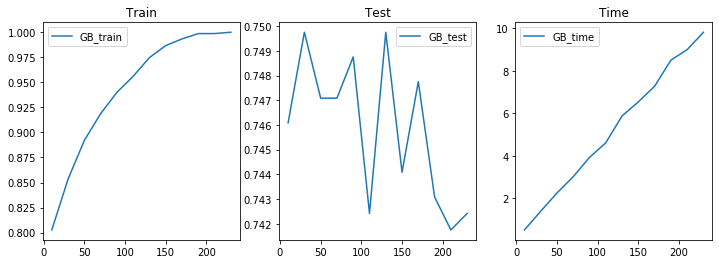

In [28]:
figure(figsize=(12, 4))
subplot(1, 3, 1)
plot(n_list, acc_train, label='GB_train')
plt.legend()
plt.title('Train')
plt.subplot(1, 3, 2)
plot(n_list, acc_test, label='GB_test')
plt.legend()
plt.title('Test')
plt.subplot(1, 3, 3)
plot(n_list, time_list, label='GB_time')
plt.legend()
plt.title('Time')

Мы видим, что у бустинга ошибка на Train всё время уменьшается, а ошибка на Test начинает расти, начиная с некоторого количества деревьев. То есть, начиная с этого числа деревьев алгоритм переобучается. Значит, нам надо остановиться на 
некотором числе деревьев, которому на графике ошибки на тесте соответствует наименьшая ошибка.

### Задание 8. 

После выбора числа деревьев остальные параметры у бустинга можно подбирать с помощью GridSearchCV.
Подберите max_features, max_depth и min_samples_leaf для бустинга с помощью GridSearchCV. 

In [ ]:
#your code here

In [ ]:
gs.best_estimator_, gs.best_score_

### Вывод.

И решающий лес, и градиентный бустинг - это мощные ансамблевые алгоритмы, которые при должной настройке параметров показывают хорошее качество работы. Но надо помнить, что градиентный бустинг имеет склонность к переобучению с увеличением числа деревьев, и аккуратно подбирать число деревьев для алгоритма. 